# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from matplotlib import style
style.use('seaborn')
%config InlineBackend.figure_format = 'svg' 

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-66b4e5dd9673>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

In [7]:
categorical = data.columns[1:4].tolist() + data.columns[5:14].tolist() + data.columns[17: 25].tolist() + ['cheating'] #категориальные признаки(остальные числовые)
categorical#категориальные признаки

['Subject',
 'school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'cheating']

In [8]:
len(categorical)#количество категориальных признаков

21

In [9]:
for col in data.columns.tolist():
    print(col, ':', data[col].unique())

ID : [100097 101021 102965 ... 998425 999143 999194]
Subject : ['Por' 'Math']
school : ['GP' 'MS']
sex : ['F' 'M' 'm']
age : [16 17 18 15 19 21 20 22]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T' 't']
Medu : ['3' '1' '2' '4' '0' 'o']
Fedu : ['4' '2' '3' '1' 'o' '0']
Mjob : ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob : ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason : ['course' 'home' 'reputation' 'other']
guardian : ['father' 'mother' 'other' 'futher']
traveltime : [1 2 3 4]
studytime : [1 2 4 3]
failures : [0 2 1 3]
schoolsup : ['no' 'yes']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['yes' 'no']
romantic : ['no' nan 'yes']
famrel : [ 3.  5.  4.  1.  2. nan]
freetime : [2 3 4 1 5]
goout : [1 4 5 3 2]
Dalc : [ 1.  3.  4.  2.  5. nan]
Walc : [ 4.  3.  5.  1.  2. nan]
health : [5 3 4 2 1]
absences : [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 2

In [10]:
data.loc[data['sex'] == 'm', 'sex'] = 'M'#удаление опечаток

In [11]:
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'

In [12]:
data.loc[data['Medu'] == 'o', 'Medu'] = '0'

In [13]:
data.loc[data['Fedu'] == 'o', 'Fedu'] = '0'

In [14]:
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'

In [15]:
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'

In [16]:
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

In [17]:
for col in categorical:
    data[col] = data[col].astype('category')

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [18]:
data.shape

(1044, 36)

In [19]:
data['romantic'].value_counts().sum()#10 пропусков

1034

In [20]:
data['famrel'].value_counts().sum()

1034

In [21]:
data['Dalc'].value_counts().sum()

1034

In [22]:
data['Walc'].value_counts().sum()

1034

In [23]:
data['cheating'].value_counts().sum()#700 пропусков

344

In [24]:
data['cheating']=data['cheating'].fillna('no') 

In [25]:
data = data.dropna()

In [26]:
for col in data.columns.tolist():
    print(col, ':', data[col].unique())

ID : [100097 101021 102965 ... 997832 997897 999143]
Subject : [Por, Math]
Categories (2, object): [Por, Math]
school : [GP, MS]
Categories (2, object): [GP, MS]
sex : [F, M]
Categories (2, object): [F, M]
age : [16 17 18 15 19 21 20 22]
address : [U, R]
Categories (2, object): [U, R]
famsize : [GT3, LE3]
Categories (2, object): [GT3, LE3]
Pstatus : [A, T]
Categories (2, object): [A, T]
Medu : [3, 1, 2, 4, 0]
Categories (5, object): [3, 1, 2, 4, 0]
Fedu : [4, 2, 3, 1, 0]
Categories (5, object): [4, 2, 3, 1, 0]
Mjob : [services, other, health, teacher, at_home]
Categories (5, object): [services, other, health, teacher, at_home]
Fjob : [other, services, health, at_home, teacher]
Categories (5, object): [other, services, health, at_home, teacher]
reason : [course, home, reputation, other]
Categories (4, object): [course, home, reputation, other]
guardian : [father, mother, other]
Categories (3, object): [father, mother, other]
traveltime : [1 2 3 4]
studytime : [1 2 4 3]
failures : [0 2 1

In [27]:
#удалены все пропуски и опечатки

### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [28]:
needed_cols = list(set(data.columns) - set(['ID','Subject','paid', 'cheating', 'G1','G2','G3', 'freetime']))

data_dupl = data[data.duplicated(needed_cols, keep=False)]
indexes = data_dupl.groupby(needed_cols).apply(lambda x: tuple(x.index)).tolist()#список пар дубликатов
len(indexes) #учеников посещают 2 курса

77

### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [29]:
#числовые характеристики

In [30]:
data.describe()

,ID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,548141.720120,16.741036,1.523904,1.973108,0.264940,3.937251,3.205179,3.163347,1.498008,2.286853,3.541833,4.477092,11.199203,11.232072,11.321713
std,264334.834435,1.240987,0.735394,0.841516,0.658956,0.934039,1.031765,1.157235,0.914596,1.289341,1.423084,6.244477,2.989206,3.287022,3.870419
min,100097.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,322884.500000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.750000,0.000000,9.000000,9.000000,10.000000
50%,557060.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,777665.000000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,999143.000000,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [31]:
data.describe(include=['category'])

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,cheating
count,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
unique,2,2,2,2,2,2,5,5,5,5,4,3,2,2,2,2,2,2,2,2,2
top,Por,GP,F,U,GT3,T,4,2,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,no
freq,624,740,565,729,712,890,292,312,387,557,416,700,894,611,789,509,801,917,794,638,835


In [32]:
#посчитал 

In [33]:
#Сколько студентов посещают каждую из школ?

In [34]:
data['school'].value_counts()#без учёта дубликатов

GP    740
MS    264
Name: school, dtype: int64

In [35]:
data_dupl['school'].value_counts()

GP    132
MS    22 
Name: school, dtype: int64

In [36]:
#GP:
740 - 122/2

679.0

In [37]:
#MS:
264 - 20/2

254.0

In [38]:
#с учётом дубликатов

In [39]:
#Сколько студентов посещают математику, сколько - португальский?

In [40]:
data['Subject'].value_counts()

Por     624
Math    380
Name: Subject, dtype: int64

In [41]:
#Студенты какого курса чаще заваливают экзамены?

In [42]:
data.groupby('Subject')['failures'].mean()

Subject
Math    0.336842
Por     0.221154
Name: failures, dtype: float64

In [43]:
#математики

In [44]:
#Сколько в среднем времени в неделю уходит на учебу по каждому предмету?

In [45]:
data.groupby('Subject')['studytime'].mean()

Subject
Math    2.039474
Por     1.932692
Name: studytime, dtype: float64

In [46]:
#от 2 до 5 часов

In [47]:
#На что чаще обращают внимание при выборе школы?

In [48]:
data['reason'].value_counts()

course        416
home          246
reputation    236
other         106
Name: reason, dtype: int64

In [49]:
data_dupl['reason'].value_counts()#дубликаты не влияют 

course        60
home          44
reputation    38
other         12
Name: reason, dtype: int64

In [50]:
#читаемые курсы в первую очередь, близость к дому и репутация во вторую 

### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

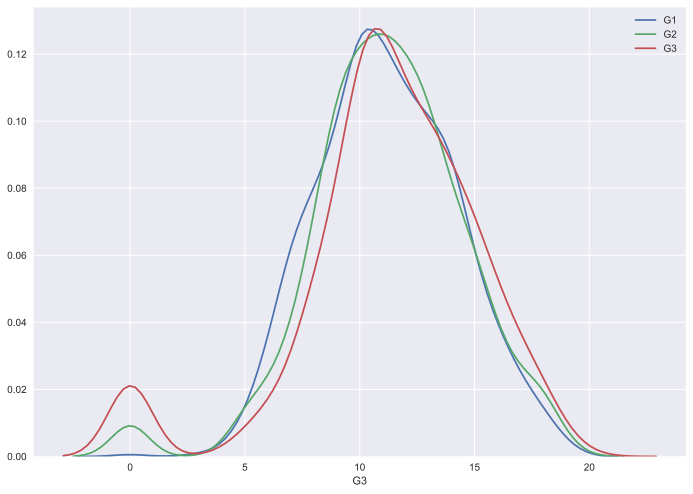

In [51]:
plt.figure(figsize=(11.7, 8.27))

sns.distplot(data['G1'], kde=True, hist=False, label = 'G1')
sns.distplot(data['G2'], kde=True, hist=False, label = 'G2')
sns.distplot(data['G3'], kde=True, hist=False, label = 'G3')
plt.legend(loc='best')
plt.show()

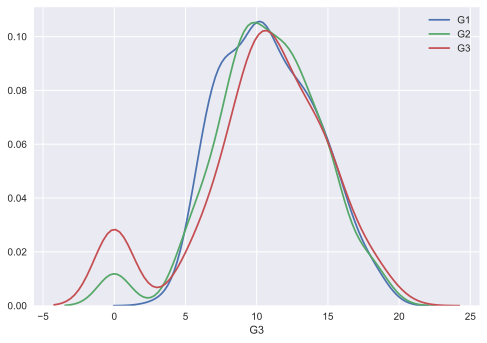

In [52]:
plt.figure()
sns.distplot(data[data['Subject'] == 'Math']['G1'], kde=True, hist=False, label = 'G1')
sns.distplot(data[data['Subject'] == 'Math']['G2'], kde=True, hist=False, label = 'G2')
sns.distplot(data[data['Subject'] == 'Math']['G3'], kde=True, hist=False, label = 'G3')
plt.legend(loc='best')
plt.show()

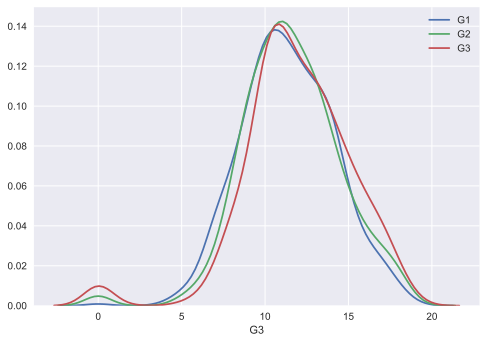

In [53]:
plt.figure()
sns.distplot(data[data['Subject'] == 'Por']['G1'], kde=True, hist=False, label = 'G1')
sns.distplot(data[data['Subject'] == 'Por']['G2'], kde=True, hist=False, label = 'G2')
sns.distplot(data[data['Subject'] == 'Por']['G3'], kde=True, hist=False, label = 'G3')
plt.legend(loc='best')
plt.show()

In [54]:
#распределение оценок близко к нормальному, средняя оценка где-то 11
#оценки для обоих предметов распределяются одинаково(в том числе и для разных предметов)

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

In [55]:
сorr_mat = data.corr()
сorr_mat

,ID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ID,1.000000,0.010251,0.006719,0.038751,0.008118,0.037477,0.040389,-0.042988,-0.026872,-0.071689,-0.004739,-0.042343,0.041007,0.016003,0.008107
age,0.010251,1.000000,0.041749,-0.005721,0.280275,0.009191,-0.002066,0.114182,0.126916,0.091959,-0.033943,0.141272,-0.118582,-0.112837,-0.117976
traveltime,0.006719,0.041749,1.000000,-0.085153,0.083616,-0.015958,0.000099,0.051641,0.115694,0.087396,-0.033348,-0.023654,-0.130522,-0.150575,-0.112519
studytime,0.038751,-0.005721,-0.085153,1.000000,-0.152551,0.006730,-0.088948,-0.070222,-0.150985,-0.222608,-0.054424,-0.073259,0.211405,0.181398,0.158775
failures,0.008118,0.280275,0.083616,-0.152551,1.000000,-0.047476,0.104736,0.076550,0.115023,0.108778,0.055150,0.093791,-0.371008,-0.373639,-0.382542
famrel,0.037477,0.009191,-0.015958,0.006730,-0.047476,1.000000,0.135450,0.077749,-0.077758,-0.104253,0.104362,-0.063408,0.033049,0.035273,0.052474
freetime,0.040389,-0.002066,0.000099,-0.088948,0.104736,0.135450,1.000000,0.327620,0.142011,0.128090,0.078348,-0.033778,-0.050441,-0.065206,-0.057242
goout,-0.042988,0.114182,0.051641,-0.070222,0.076550,0.077749,0.327620,1.000000,0.250878,0.398221,-0.021710,0.049221,-0.099340,-0.107216,-0.092770
Dalc,-0.026872,0.126916,0.115694,-0.150985,0.115023,-0.077758,0.142011,0.250878,1.000000,0.630366,0.062878,0.127167,-0.146092,-0.126698,-0.125858
Walc,-0.071689,0.091959,0.087396,-0.222608,0.108778,-0.104253,0.128090,0.398221,0.630366,1.000000,0.095608,0.129108,-0.141598,-0.123703,-0.110614


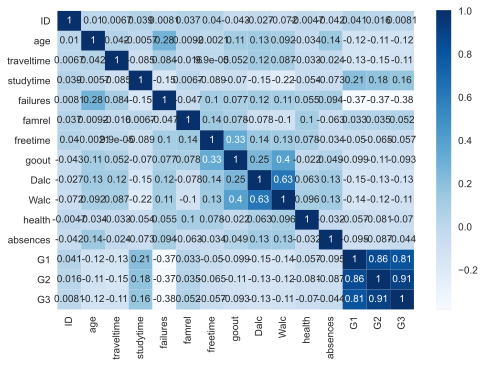

In [56]:
sns.heatmap(сorr_mat, annot=True, cmap='Blues')
plt.ylim((сorr_mat.shape[0], 0))
plt.show()

In [57]:
#высокая корреляция: 
                   #Walc с Dalc
                   #G1, G2, G3 между собой
                   #failurse с  G1, G2, G3
                   #Walc с goout
#сюда же, наверное, можно отнести Dalc с goout и freetime с goout
#логичными выглядит зависимтости studytime с G1, G2, G3 и многие другие зависимости с коэффициентом больше 0.1 по модулю

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [58]:
depended = set()
for i in range(len(categorical)):
    for j in range(len(categorical)):
        obs = pd.crosstab(data[categorical[i]], data[categorical[j]])
        r = chi2_contingency(obs, correction=False)
        if r[1] <= 0.0001 and categorical[i] != categorical[j]:
            depended.add(frozenset([categorical[i], categorical[j]]))
print(len(depended))
depended

44


{frozenset({'Fedu', 'Fjob'}),
 frozenset({'Mjob', 'internet'}),
 frozenset({'Fedu', 'famsup'}),
 frozenset({'Pstatus', 'guardian'}),
 frozenset({'Medu', 'school'}),
 frozenset({'higher', 'school'}),
 frozenset({'famsup', 'paid'}),
 frozenset({'Pstatus', 'famsize'}),
 frozenset({'Mjob', 'address'}),
 frozenset({'Subject', 'paid'}),
 frozenset({'Fjob', 'guardian'}),
 frozenset({'Medu', 'internet'}),
 frozenset({'guardian', 'romantic'}),
 frozenset({'Subject', 'school'}),
 frozenset({'Fedu', 'school'}),
 frozenset({'paid', 'school'}),
 frozenset({'internet', 'school'}),
 frozenset({'Medu', 'famsup'}),
 frozenset({'Fjob', 'Medu'}),
 frozenset({'higher', 'paid'}),
 frozenset({'Fedu', 'address'}),
 frozenset({'reason', 'school'}),
 frozenset({'Fedu', 'internet'}),
 frozenset({'internet', 'paid'}),
 frozenset({'address', 'school'}),
 frozenset({'Fjob', 'Mjob'}),
 frozenset({'address', 'reason'}),
 frozenset({'Medu', 'Mjob'}),
 frozenset({'famsup', 'sex'}),
 frozenset({'Mjob', 'higher'}),
 fro

In [59]:
#стандартное ограничение p <=0.05 не очень подходит, тк много неадекватных корреляций(например с полом)

### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

In [60]:
data.Walc.mean()

2.2868525896414345

In [61]:
data.Dalc.mean()

1.49800796812749

In [62]:
#люди употребляют больше алкоголя в выходные

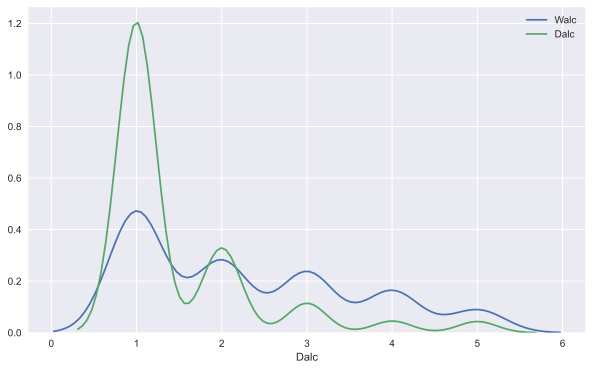

In [63]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Walc'], label = 'Walc', kde=True, hist=False)
sns.distplot(data['Dalc'], label = 'Dalc', kde=True, hist=False)
#sns.distplot(data['G4'], kde=True, hist=False)
plt.legend(loc='best')
plt.show()

In [64]:
#в будние дни большинство людей практически не пьёт

In [65]:
pd.crosstab(data['Walc'], data['Dalc'])

Dalc,1.0,2.0,3.0,4.0,5.0
Walc,,,,,
1.0,376,4,1,1,1
2.0,172,49,2,2,1
3.0,101,69,16,5,0
4.0,39,56,29,8,0
5.0,9,12,18,10,23


In [66]:
#хочется создать новый параметр, который бы сочетал в себе Walc и Dalc 
#думаю, что будет логично(исходя из данных выше) организовать его таким образом:(ужасная картинка из пеинта, соре за неё)

![title](for_iad.png) 

In [67]:
#большинство людей практически не пьют по будням(+ есть корреляция между Walc и Dalc)
#и значит повышение Dalc должно сильно влиять на новый параметр
#есть много людей, которые пьют по выхам до троечки, поэтому Walc от 1 до 3 можно считать не сильно пьющими
#в правом верхнем углу практически нет данных, поэтому он был раскрашен без особой логики

In [68]:
data['Galc_tmp'] = 5
data.loc[((1 <= data['Walc']) & (data['Walc'] <= 3)) & (data['Dalc'] == 1), 'Galc_tmp'] = 1
data.loc[((1 <= data['Walc']) & (data['Walc'] <= 3)) & (data['Dalc'] == 2), 'Galc_tmp'] = 2
data.loc[(data['Walc'] == 4) & (data['Dalc'] == 1), 'Galc_tmp'] = 2
data.loc[((1 <= data['Walc']) & (data['Walc'] <= 3)) & (data['Dalc'] == 3), 'Galc_tmp'] = 3
data.loc[(data['Walc'] == 4) & ((2 <= data['Dalc']) & (data['Dalc'] <= 3)), 'Galc_tmp'] = 3
data.loc[((1 <= data['Walc']) & (data['Walc'] <= 3)) & (data['Dalc'] == 4), 'Galc_tmp'] = 4
data.loc[(data['Walc'] == 5) & ((1 <= data['Dalc']) & (data['Dalc'] <= 3)), 'Galc_tmp'] = 4

In [69]:
data.insert(loc=30, column='Galc', value=data['Galc_tmp']) 
data = data.drop(['Galc_tmp'], axis=1)

In [70]:
#Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?

In [71]:
#Walc и Dalc:

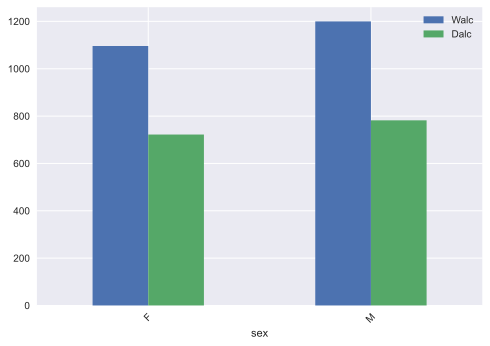

In [72]:
data[['sex', 'Walc', 'Dalc']].groupby('sex').sum().plot(kind='bar', rot=45)
plt.show() #парни пьют больше в общем и в выходные и в будни

In [73]:
data.groupby(['sex'])[['Walc', 'Dalc']].mean() #парни пьют больше в среднем и в выходные и в будни

,Walc,Dalc
sex,,
F,1.939823,1.277876
M,2.733485,1.781321


In [74]:
#Galc:

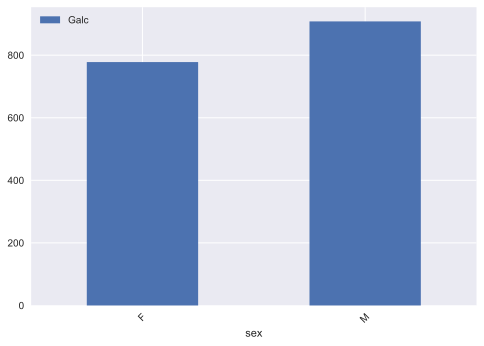

In [75]:
data[['sex', 'Galc']].groupby('sex').sum().plot(kind='bar', rot=45)
plt.show() 

In [76]:
data.groupby(['sex'])['Galc'].mean()

sex
F    1.376991
M    2.068337
Name: Galc, dtype: float64

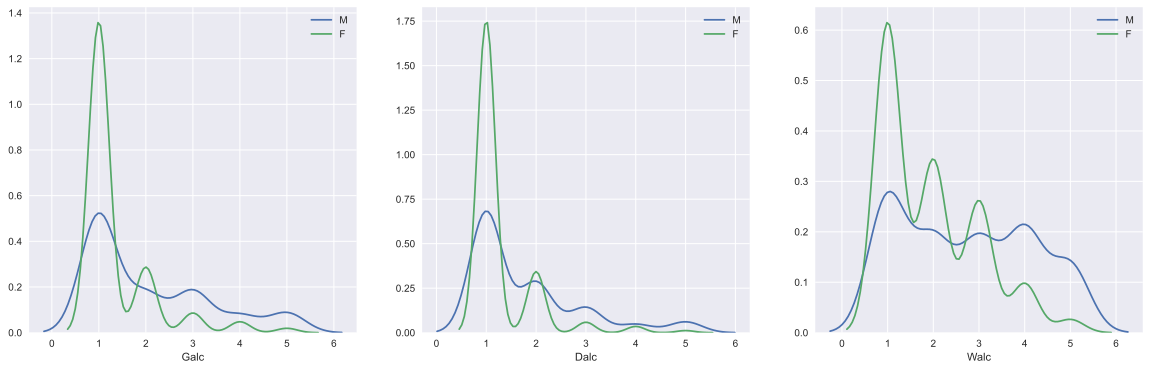

In [77]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(data[data['sex'] == 'M']['Galc'], kde=True, hist=False, label = 'M')
sns.distplot(data[data['sex'] == 'F']['Galc'], kde=True, hist=False, label = 'F')
plt.subplot(1, 3, 2)
sns.distplot(data[data['sex'] == 'M']['Dalc'], kde=True, hist=False, label = 'M')
sns.distplot(data[data['sex'] == 'F']['Dalc'], kde=True, hist=False, label = 'F')
plt.subplot(1, 3, 3)
sns.distplot(data[data['sex'] == 'M']['Walc'], kde=True, hist=False, label = 'M')
sns.distplot(data[data['sex'] == 'F']['Walc'], kde=True, hist=False, label = 'F')
plt.legend(loc='best')
plt.show()

In [78]:
#большинство девушек практически не пьёт(Galc = 1, 2)

In [79]:
#девушки практически не пьют по будням(вообще говоря большинство студентов не пьёт по будням, см. начало 7 задания)

In [80]:
#есть значительная доля девушек выпивающих по выходным(Walc = 3, 4)

In [81]:
#парней, которые много пьют в выходные(Walc = 4, 5) не многим меньше,
#чем парней которые практически не пьют по выходным(Walc = 1, 2)

In [82]:
#Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime.

In [83]:
data.groupby(['address'])[['Walc', 'Dalc', 'Galc']].mean() 

,Walc,Dalc,Galc
address,,,
R,2.381818,1.585455,1.785455
U,2.251029,1.465021,1.639232


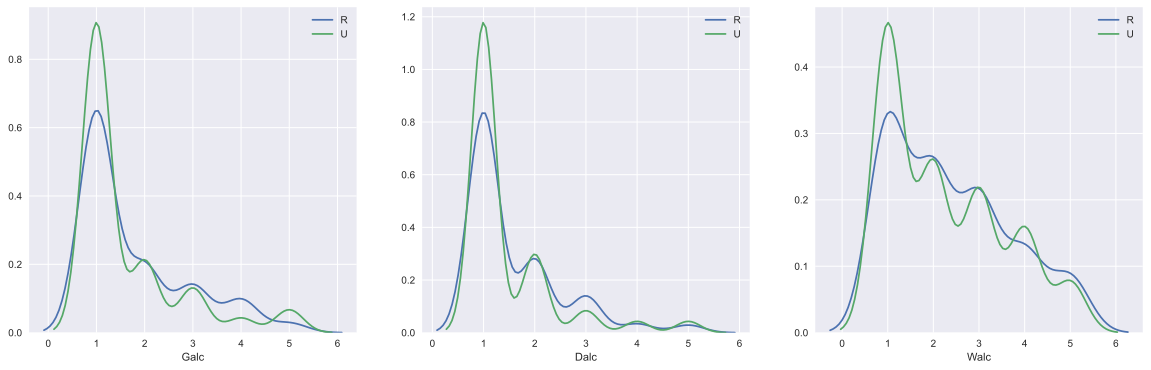

In [84]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(data[data['address'] == 'R']['Galc'], kde=True, hist=False, label = 'R')
sns.distplot(data[data['address'] == 'U']['Galc'], kde=True, hist=False, label = 'U')
plt.subplot(1, 3, 2)
sns.distplot(data[data['address'] == 'R']['Dalc'], kde=True, hist=False, label = 'R')
sns.distplot(data[data['address'] == 'U']['Dalc'], kde=True, hist=False, label = 'U')
plt.subplot(1, 3, 3)
sns.distplot(data[data['address'] == 'R']['Walc'], kde=True, hist=False, label = 'R')
sns.distplot(data[data['address'] == 'U']['Walc'], kde=True, hist=False, label = 'U')
plt.legend(loc='best')
plt.show()

In [85]:
#среди людей живущих в городе(U) большой процент сильно пьющих(Galc = 5), что компенсируется большим процентом людей с Galc = 1
#и в среднем количество потребляемого алкоголя для U и R одинаково 

In [86]:
data.groupby(['Pstatus'])[['Walc', 'Dalc', 'Galc']].mean()

,Walc,Dalc,Galc
Pstatus,,,
A,2.114035,1.447368,1.614035
T,2.308989,1.504494,1.687640


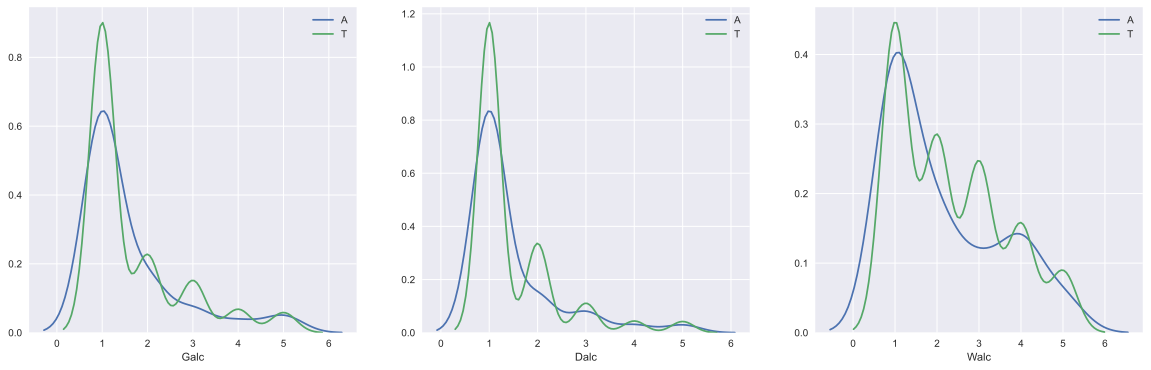

In [87]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(data[data['Pstatus'] == 'A']['Galc'], kde=True, hist=False, label = 'A')
sns.distplot(data[data['Pstatus'] == 'T']['Galc'], kde=True, hist=False, label = 'T')
plt.subplot(1, 3, 2)
sns.distplot(data[data['Pstatus'] == 'A']['Dalc'], kde=True, hist=False, label = 'A')
sns.distplot(data[data['Pstatus'] == 'T']['Dalc'], kde=True, hist=False, label = 'T')
plt.subplot(1, 3, 3)
sns.distplot(data[data['Pstatus'] == 'A']['Walc'], kde=True, hist=False, label = 'A')
sns.distplot(data[data['Pstatus'] == 'T']['Walc'], kde=True, hist=False, label = 'T')
plt.legend(loc='best')
plt.show()

In [88]:
pd.crosstab(data['Walc'], data['Pstatus']) #при Walc=3,4 распределение T и A разное, видимо из за недостаткая данных

Pstatus,A,T
Walc,,
1.0,56,327
2.0,21,205
3.0,12,179
4.0,18,114
5.0,7,65


In [89]:
#признаки не коррелируют друг с другом 

In [90]:
data.groupby(['higher'])[['Walc', 'Dalc', 'Galc']].mean()

,Walc,Dalc,Galc
higher,,,
no,2.643678,1.816092,2.126437
yes,2.252999,1.467830,1.636859


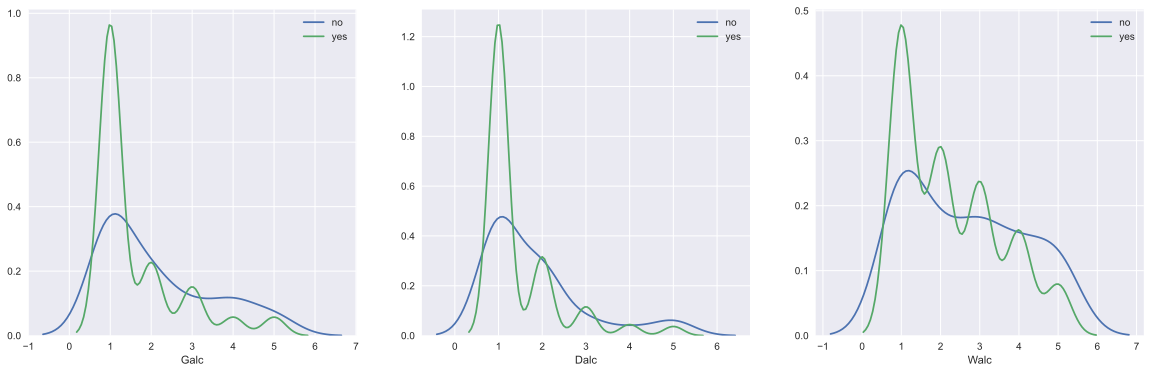

In [91]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(data[data['higher'] == 'no']['Galc'], kde=True, hist=False, label = 'no')
sns.distplot(data[data['higher'] == 'yes']['Galc'], kde=True, hist=False, label = 'yes')
plt.subplot(1, 3, 2)
sns.distplot(data[data['higher'] == 'no']['Dalc'], kde=True, hist=False, label = 'no')
sns.distplot(data[data['higher'] == 'yes']['Dalc'], kde=True, hist=False, label = 'yes')
plt.subplot(1, 3, 3)
sns.distplot(data[data['higher'] == 'no']['Walc'], kde=True, hist=False, label = 'no')
sns.distplot(data[data['higher'] == 'yes']['Walc'], kde=True, hist=False, label = 'yes')
plt.legend(loc='best')
plt.show()

In [92]:
#среди не желающих получать высшее образование(no) много пьющих людей(Gacl >= 3, Walc >= 3 и Dalc = 5 так же выделяется)
#в среднем они тоже пьют больше

In [93]:
data.groupby(['romantic'])[['Walc', 'Dalc', 'Galc']].mean()

,Walc,Dalc,Galc
romantic,,,
no,2.299373,1.463950,1.663009
yes,2.265027,1.557377,1.707650


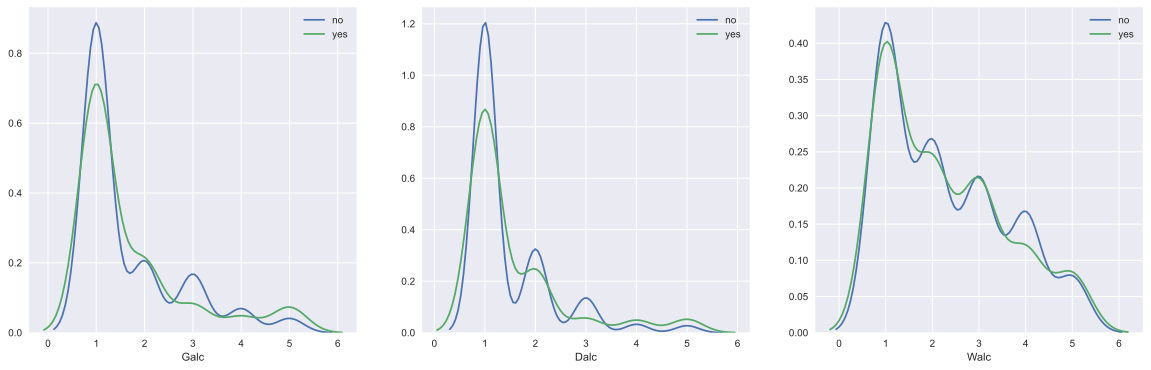

In [94]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(data[data['romantic'] == 'no']['Galc'], kde=True, hist=False, label = 'no')
sns.distplot(data[data['romantic'] == 'yes']['Galc'], kde=True, hist=False, label = 'yes')
plt.subplot(1, 3, 2)
sns.distplot(data[data['romantic'] == 'no']['Dalc'], kde=True, hist=False, label = 'no')
sns.distplot(data[data['romantic'] == 'yes']['Dalc'], kde=True, hist=False, label = 'yes')
plt.subplot(1, 3, 3)
sns.distplot(data[data['romantic'] == 'no']['Walc'], kde=True, hist=False, label = 'no')
sns.distplot(data[data['romantic'] == 'yes']['Walc'], kde=True, hist=False, label = 'yes')
plt.legend(loc='best')
plt.show()

In [95]:
#среди yes доля с Galc = 5 больше чем c Galc = 4 или Galc = 3, а среди no сильно пьющих почти нет(Galc = 4, 5)
#в среднем yes и no пьют одинаково 

In [96]:
data.groupby(['freetime'])[['Walc', 'Dalc', 'Galc']].mean()

,Walc,Dalc,Galc
freetime,,,
1,2.032787,1.475410,1.672131
2,2.164634,1.323171,1.518293
3,2.165816,1.390306,1.563776
4,2.450355,1.645390,1.804965
5,2.638095,1.790476,2.028571


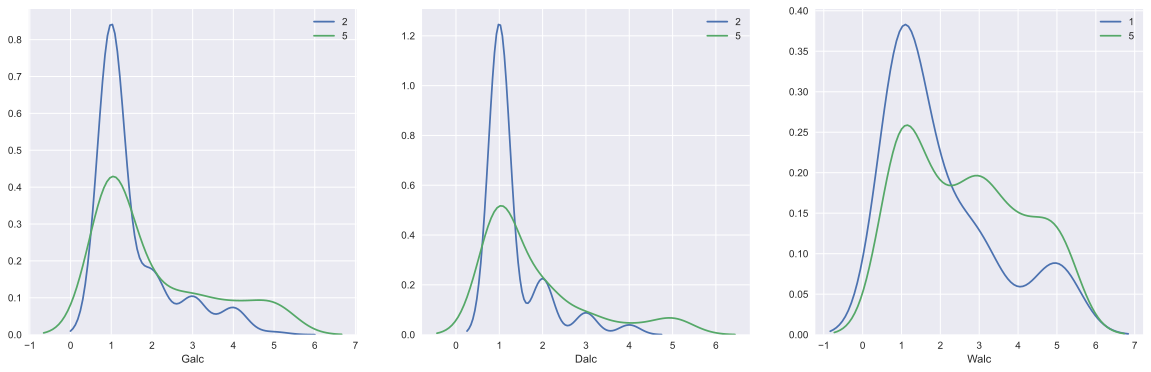

In [97]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(data[data['freetime'] == 2]['Galc'], kde=True, hist=False, label = '2')
sns.distplot(data[data['freetime'] == 5]['Galc'], kde=True, hist=False, label = '5')
plt.subplot(1, 3, 2)

sns.distplot(data[data['freetime'] == 2]['Dalc'], kde=True, hist=False, label = '2')

sns.distplot(data[data['freetime'] == 5]['Dalc'], kde=True, hist=False, label = '5')
plt.subplot(1, 3, 3)
sns.distplot(data[data['freetime'] == 1]['Walc'], kde=True, hist=False, label = '1')
sns.distplot(data[data['freetime'] == 5]['Walc'], kde=True, hist=False, label = '5')
plt.legend(loc='best')
plt.show()

In [98]:
#значительная группа Galc = 5,4 срреди 5 и большая группа Galc = 1 среди 2(+ графики с Walc и Dalc) + средние значения => \
#чем больше freetime,\
#тем больше употребление алкоголя

In [99]:
#итог: видимо есть сильная корреляция с higher и freetime

In [100]:
#Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).

In [101]:
data['Gedu_tmp'] = 'other'

In [102]:
data.loc[data['guardian'] == 'mother', 'Gedu_tmp'] = data['Medu']

In [103]:
data.loc[data['guardian'] == 'father', 'Gedu_tmp'] = data['Fedu']

In [104]:
data.insert(loc=10, column='Gedu', value=data['Gedu_tmp']) 
data = data.drop(['Gedu_tmp'], axis=1)

In [105]:
data['Gedu'].unique()

array(['4', '3', '1', '2', 'other', '0'], dtype=object)

In [106]:
data_gurd_edu = data[data['Gedu'] != 'other']

In [107]:
data_gurd_edu.groupby(['Gedu'])[['Walc', 'Dalc', 'Galc']].mean()

,Walc,Dalc,Galc
Gedu,,,
0,3.333333,1.666667,2.333333
1,2.387879,1.460606,1.709091
2,2.147601,1.435424,1.568266
3,2.463303,1.536697,1.729358
4,2.249097,1.487365,1.671480


In [108]:
data_gurd_edu.Gedu.value_counts()#Gedu = 0 можно выбросить

4    277
2    271
3    218
1    165
0    3  
Name: Gedu, dtype: int64

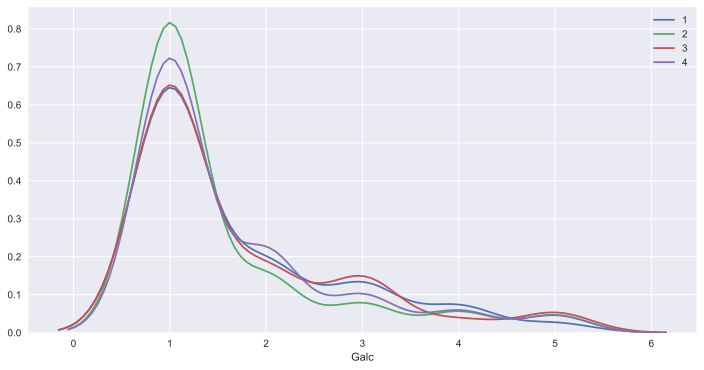

In [109]:
plt.figure(figsize=(12, 6))
sns.distplot(data_gurd_edu[data_gurd_edu['Gedu'] == '1']['Galc'], kde=True, hist=False, label = '1')
sns.distplot(data_gurd_edu[data_gurd_edu['Gedu'] == '2']['Galc'], kde=True, hist=False, label = '2')
sns.distplot(data_gurd_edu[data_gurd_edu['Gedu'] == '3']['Galc'], kde=True, hist=False, label = '3')
sns.distplot(data_gurd_edu[data_gurd_edu['Gedu'] == '4']['Galc'], kde=True, hist=False, label = '4')
plt.legend(loc='best')
plt.show()

In [110]:
#среди 2 большая доля практически не пьющих(Galc = 1, 2) + маленькое среднее значение, выделяется небольшая группа с Galc = 5
#среди 1 много людей пьёт средне(Galc = 2, 3, 4)и практически нет Galc = 5, примерно такая же ситуация у 3
#среди 3 пратически нет Galc = 4, но есть Galc = 5, что отличает их от 1(средние значения у 1 и 3 совпадают\
#и являются наибольшими свреди всех остальных)
#4 не находиться где то между 2 и 1, 3
#1,3 самые пьющие, затем идут 2 и самые не пьющие 1
#хотя, стоит скзать, что потребление алкоголя в принципе не сильно завивист от Gedu

In [111]:
#Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). Выполните сравнение отдельно для каждого предмета (Math и Por). Дайте содержательный комментарий.

In [112]:
best = data.sort_values('G3', ascending=False)
worst = data.sort_values('G3')

In [113]:
best = best[best.duplicated(needed_cols, keep='first') == False].head(50)
worst = worst[worst.duplicated(needed_cols, keep='first') == False].head(50) 

In [114]:
best[['Walc', 'Dalc', 'Galc']].mean()

Walc    1.90
Dalc    1.24
Galc    1.36
dtype: float64

In [115]:
worst[['Walc', 'Dalc', 'Galc']].mean()

Walc    2.1
Dalc    1.5
Galc    1.7
dtype: float64

In [116]:
worst['G3'].unique()#возможно 50 худших выбросы

array([0], dtype=int64)

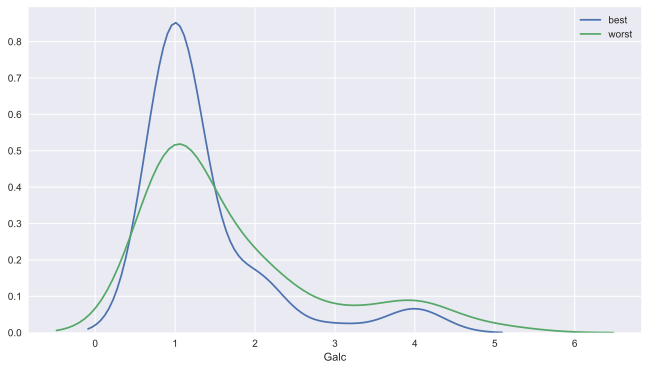

In [117]:
plt.figure(figsize=(11, 6))
sns.distplot(best['Galc'], kde=True, hist=False, label = 'best')
sns.distplot(worst['Galc'], kde=True, hist=False, label = 'worst')
plt.legend(loc='best')
plt.show()

In [118]:
#лучшие ученики пьют меньше в среднем + среди них подавляющее большинство имеет Galc = 1 + нет Galc = 5
#среди худших много Galc >= 3

In [119]:
worst = data[data.G3 > 0].sort_values('G3').head(50)

In [120]:
worst['G3'].unique()

array([1, 4, 5, 6, 7, 8], dtype=int64)

In [121]:
worst[['Walc', 'Dalc', 'Galc']].mean()

Walc    2.62
Dalc    1.78
Galc    2.08
dtype: float64

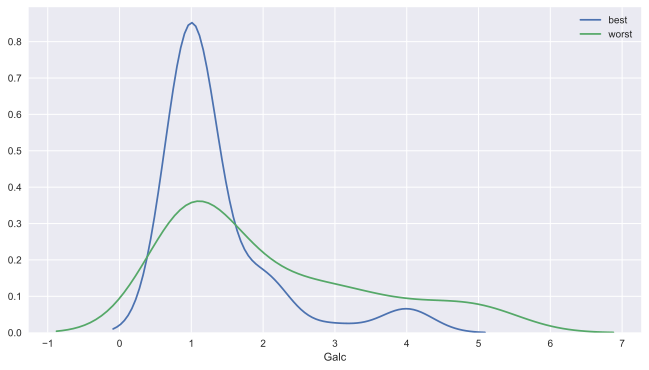

In [122]:
plt.figure(figsize=(11, 6))
sns.distplot(best['Galc'], kde=True, hist=False, label = 'best')
sns.distplot(worst['Galc'], kde=True, hist=False, label = 'worst')
plt.legend(loc='best')
plt.show()

In [123]:
#для худших  с оценокй G3 > 0 ситуация полностью аналогичная

In [124]:
best = data[data['Subject'] == 'Math'].sort_values('G3', ascending=False).head(50)
worst = data[data['Subject'] == 'Math'].sort_values('G3').head(50)

In [125]:
best[['Walc', 'Dalc', 'Galc']].mean()

Walc    1.92
Dalc    1.24
Galc    1.38
dtype: float64

In [126]:
worst[['Walc', 'Dalc', 'Galc']].mean()

Walc    2.12
Dalc    1.46
Galc    1.64
dtype: float64

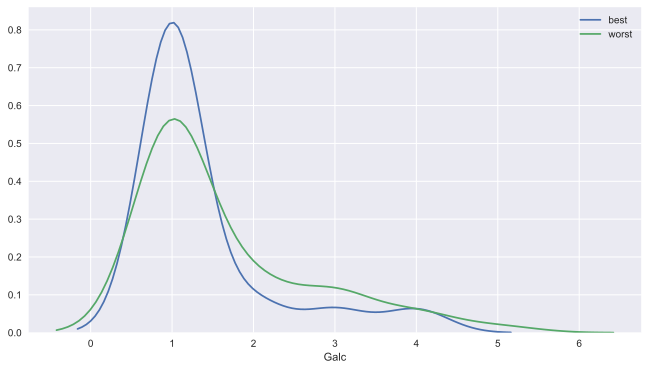

In [127]:
plt.figure(figsize=(11, 6))
sns.distplot(best['Galc'], kde=True, hist=False, label = 'best')
sns.distplot(worst['Galc'], kde=True, hist=False, label = 'worst')
plt.legend(loc='best')
plt.show()

In [128]:
best = data[data['Subject'] == 'Por'].sort_values('G3', ascending=False).head(50)
worst = data[data['Subject'] == 'Por'].sort_values('G3').head(50)

In [129]:
best[['Walc', 'Dalc', 'Galc']].mean()

Walc    1.90
Dalc    1.24
Galc    1.32
dtype: float64

In [130]:
worst[['Walc', 'Dalc', 'Galc']].mean()

Walc    2.82
Dalc    1.88
Galc    2.20
dtype: float64

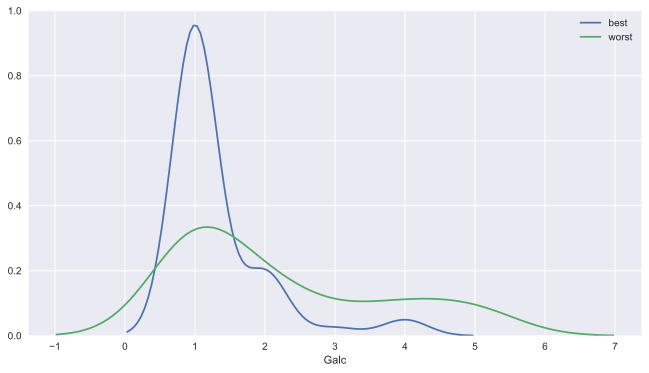

In [131]:
plt.figure(figsize=(11, 6))
sns.distplot(best['Galc'], kde=True, hist=False, label = 'best')
sns.distplot(worst['Galc'], kde=True, hist=False, label = 'worst')
plt.legend(loc='best')
plt.show()

In [132]:
#разница между лучшими и худшими учениками по употреблением алкоголя среди изучающих португальский выше
#по средним значениям и по значительной доле Galc = 5, 4 среди худших изучаюших португальский + мало Galc = 1

### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

In [133]:
data.groupby(['sex'])['G1', 'G2', 'G3'].mean() #у жевушек на 0.1-0.2 балла больше, вряд ли это можно назвать зависимостью

<ipython-input-133-6c16bbebc40e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['sex'])['G1', 'G2', 'G3'].mean() #у жевушек на 0.1-0.2 балла больше, вряд ли это можно назвать зависимостью


,G1,G2,G3
sex,,,
F,11.256637,11.295575,11.421239
M,11.125285,11.150342,11.193622


In [134]:
data.groupby(['traveltime'])['G1', 'G2', 'G3'].mean()#оценка сильно зависит от времени в пути от дома до школы

<ipython-input-134-193ffb93f2b2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['traveltime'])['G1', 'G2', 'G3'].mean()#оценка сильно зависит от времени в пути от дома до школы


,G1,G2,G3
traveltime,,,
1,11.501667,11.576667,11.666667
2,10.849673,10.918301,10.928105
3,10.621622,10.378378,10.527027
4,9.875000,9.250000,10.166667


In [135]:
data.groupby(['famsup'])['G1', 'G2', 'G3'].mean() #зависимость оценки от помощи родителей нет

<ipython-input-135-a1badc61f3e9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['famsup'])['G1', 'G2', 'G3'].mean() #зависимость оценки от помощи родителей нет


,G1,G2,G3
famsup,,,
no,11.236641,11.251908,11.244275
yes,11.175123,11.219313,11.371522


In [136]:
data.groupby(['schoolsup'])['G1', 'G2', 'G3'].mean()#к детей, который помогают одноклассники оценки ниже

<ipython-input-136-14e76fbc1281>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['schoolsup'])['G1', 'G2', 'G3'].mean()#к детей, который помогают одноклассники оценки ниже


,G1,G2,G3
schoolsup,,,
no,11.338926,11.328859,11.416107
yes,10.063636,10.445455,10.554545


In [137]:
data.groupby(['schoolsup', 'famsup'])['G1', 'G2', 'G3'].mean()#возможно стоит обращать внимание только на последний столбец
                                                              #видно, что чем больше помощи, тем ниже оценка

<ipython-input-137-6dec5004b124>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['schoolsup', 'famsup'])['G1', 'G2', 'G3'].mean()#возможно стоит обращать внимание только на последний столбец


G1         G2         G3
schoolsup famsup                                 
no        no      11.368421  11.321330  11.293629
          yes     11.318949  11.333959  11.499062
yes       no      9.750000   10.468750  10.687500
          yes     10.192308  10.435897  10.500000

In [138]:
data.groupby(['paid'])['G1', 'G2', 'G3'].mean()#у людей посещяющих платные курсы оценки ниже, но не сильно

<ipython-input-138-0807fe961db0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['paid'])['G1', 'G2', 'G3'].mean()#у людей посещяющих платные курсы оценки ниже, но не сильно


,G1,G2,G3
paid,,,
no,11.259823,11.258555,11.425856
yes,10.976744,11.134884,10.939535


In [139]:
data.groupby(['internet'])['G1', 'G2', 'G3'].mean()#у людей без доступа к интернету оценки в среднем на 1 балл ниже

<ipython-input-139-92a45b1eb89d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['internet'])['G1', 'G2', 'G3'].mean()#у людей без доступа к интернету оценки в среднем на 1 балл ниже


,G1,G2,G3
internet,,,
no,10.57619,10.395238,10.457143
yes,11.36398,11.453401,11.550378


In [140]:
data.groupby(['romantic'])['G1', 'G2', 'G3'].mean()#у людей состоящих в отношениях оценки в среднем на 1 балл ниже

<ipython-input-140-a305f049d1e1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['romantic'])['G1', 'G2', 'G3'].mean()#у людей состоящих в отношениях оценки в среднем на 1 балл ниже


,G1,G2,G3
romantic,,,
no,11.332288,11.482759,11.622257
yes,10.967213,10.795082,10.797814


In [141]:
data.groupby(['Dalc'])['G1', 'G2', 'G3'].mean()#вывод про алкоголь ниже

<ipython-input-141-72b413f4383f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Dalc'])['G1', 'G2', 'G3'].mean()#вывод про алкоголь ниже


,G1,G2,G3
Dalc,,,
1.0,11.466284,11.506456,11.671449
2.0,10.810526,10.752632,10.573684
3.0,10.530303,10.727273,10.954545
4.0,9.884615,9.576923,9.269231
5.0,9.840000,10.280000,10.360000


In [142]:
data.groupby(['Walc'])['G1', 'G2', 'G3'].mean()#ещё ниже

<ipython-input-142-0286c9547e43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Walc'])['G1', 'G2', 'G3'].mean()#ещё ниже


,G1,G2,G3
Walc,,,
1.0,11.467363,11.550914,11.676240
2.0,11.575221,11.420354,11.477876
3.0,11.183246,11.308901,11.366492
4.0,10.348485,10.325758,10.469697
5.0,10.194444,10.402778,10.388889


In [143]:
data.groupby(['Dalc', 'Walc'])['G1', 'G2', 'G3'].mean()#ещё ниже

<ipython-input-143-3a69ad4cd3f3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Dalc', 'Walc'])['G1', 'G2', 'G3'].mean()#ещё ниже


G1         G2         G3
Dalc Walc                                 
1.0  1.0   11.478723  11.561170  11.702128
     2.0   11.784884  11.622093  11.825581
     3.0   11.158416  11.534653  11.544554
     4.0   10.974359  10.641026  11.153846
     5.0   10.444444  10.444444  11.111111
2.0  1.0   9.750000   10.000000  8.500000 
     2.0   10.959184  10.877551  10.571429
     3.0   11.550725  11.478261  11.550725
     4.0   9.839286   9.732143   9.678571 
     5.0   10.833333  11.083333  9.833333 
3.0  1.0   18.000000  18.000000  18.000000
     2.0   11.000000  11.000000  10.500000
     3.0   10.437500  10.062500  10.500000
     4.0   10.482759  10.896552  11.172414
     5.0   10.222222  10.611111  10.666667
4.0  1.0   7.000000   8.000000   9.000000 
     2.0   10.500000  8.500000   5.500000 
     3.0   9.000000   8.400000   8.000000 
     4.0   10.375000  10.875000  10.125000
     5.0   10.100000  9.500000   10.000000
5.0  1.0   12.000000  11.000000  11.000000
     2.0   9.000000   10.000000  10.000000
     5.0   9.782609   10.260870  10.347826

In [144]:
data.groupby(['Dalc', 'Walc'])['G1', 'G2', 'G3'].count()#видно, что на многие строки таблицы выше обращать внимание не стоит,\ 
                                                        #т.к. мало данных

<ipython-input-144-03905a809748>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Dalc', 'Walc'])['G1', 'G2', 'G3'].count()#видно, что на многие строки таблицы выше обращать внимание не стоит,\


G1   G2   G3
Dalc Walc               
1.0  1.0   376  376  376
     2.0   172  172  172
     3.0   101  101  101
     4.0   39   39   39 
     5.0   9    9    9  
2.0  1.0   4    4    4  
     2.0   49   49   49 
     3.0   69   69   69 
     4.0   56   56   56 
     5.0   12   12   12 
3.0  1.0   1    1    1  
     2.0   2    2    2  
     3.0   16   16   16 
     4.0   29   29   29 
     5.0   18   18   18 
4.0  1.0   1    1    1  
     2.0   2    2    2  
     3.0   5    5    5  
     4.0   8    8    8  
     5.0   10   10   10 
5.0  1.0   1    1    1  
     2.0   1    1    1  
     5.0   23   23   23

In [145]:
#употребление алкоголя в будние дни сильнее влияет на оценки, чем употребление алкоголя в выходные
#самые низки оценки у людей, которые употребляют алкоголь в больших количествах и в выходные и вбудние дни
#это видно из строк 1.1 и 5.5 табоицы выше
#можно обратить внимание на строки 3.5 и 4.5
#видно, что употребление алкоголя находится в обратной корреляции с оценками
#это, кстати, уже было замечено выше

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [146]:
data['G4'] = 1
data.loc[(18 <= data['G3']) & (data['G3'] <= 20), 'G4'] = 4
data.loc[(14 <= data['G3']) & (data['G3'] <= 17), 'G4'] = 3
data.loc[(8 <= data['G3']) & (data['G3'] <= 13), 'G4'] = 2

In [147]:
data.G4.unique()

array([3, 2, 1, 4], dtype=int64)

In [148]:
data.G3.unique()

array([14, 17, 10, 16, 12,  9,  6, 11,  8, 13, 18, 15,  0,  5,  7,  4, 19,
        1, 20], dtype=int64)

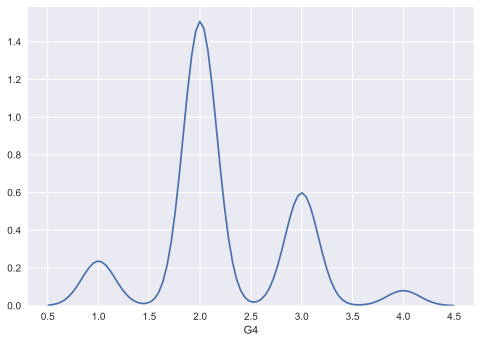

In [149]:
sns.distplot(data['G4'], kde=True, hist=False)
plt.show()

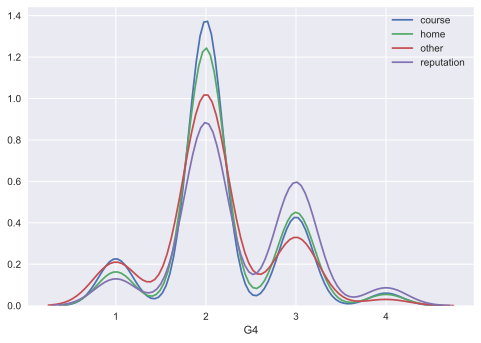

In [150]:
plt.figure()
sns.distplot(data[data['reason'] == 'course']['G4'], kde=True, hist=False, label = 'course')
sns.distplot(data[data['reason'] == 'home']['G4'], kde=True, hist=False, label = 'home')
sns.distplot(data[data['reason'] == 'other']['G4'], kde=True, hist=False, label = 'other')
sns.distplot(data[data['reason'] == 'reputation']['G4'], kde=True, hist=False, label = 'reputation')
#sns.distplot(data['G4'], kde=True, hist=False)
plt.legend(loc='best')
plt.show()

In [151]:
data.reason.value_counts()

course        416
home          246
reputation    236
other         106
Name: reason, dtype: int64

In [152]:
#распределение для home и course одинаковое 
#серди reputation вероятность получить высокую оценку(3 или 4) самая выскоая среди всех остальных reason
#и в то же время самая низкая вероятность получить низкую оценку(1 или 2), опять же среди всех остальных reason
#среди other самая низкая вероятность получить высокую оценку

### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [153]:
#studytime - Количество часов на учебу в неделю: 1 - < 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, 4 - > 10 часов
#failures - Число завалов студента по предыдущим курсам: 0 <= n <=3 

In [154]:
#studytime и failures хорошо коррелируют с оценками(см. задание 5), поэтому 

In [155]:
data = data.eval('G4_prediction_tmp = studytime - failures + 4')

In [156]:
data.G4_prediction_tmp.unique()

array([5, 6, 3, 4, 8, 7, 2], dtype=int64)

In [157]:
data.loc[(3 <= data['G4_prediction_tmp']) & (data['G4_prediction_tmp'] <= 5), 'G4_prediction'] = 2
data.loc[(6 <= data['G4_prediction_tmp']) & (data['G4_prediction_tmp'] <= 7), 'G4_prediction'] = 3
data.loc[data['G4_prediction_tmp'] == 8 , 'G4_prediction'] = 4
data.loc[data['G4_prediction_tmp'] == 2, 'G4_prediction'] = 1

In [158]:
data.G4_prediction.unique()

array([2., 3., 4., 1.])

In [159]:
data = data.drop(['G4_prediction_tmp'], axis=1)

In [160]:
data.loc[:, 'G1':]

,G1,G2,G3,G4,G4_prediction
0,15,13,14,3,2.0
1,17,18,17,3,3.0
2,9,8,10,2,2.0
3,14,15,16,3,3.0
5,11,11,12,2,2.0
...,...,...,...,...,...
1037,13,12,12,2,3.0
1038,13,12,13,2,3.0
1039,10,10,10,2,2.0
1040,10,9,10,2,3.0


In [161]:
data[data['G4_prediction'] == data['G4']].shape[0]

449

In [162]:
#точность 45%

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [163]:
# your code here